# Guide: Convolutions and local structure

The assignments for this week is given in a separate notebook. This notebook just contains examples and is not graded.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wget
from scipy.ndimage import convolve

np.set_printoptions(precision=2, suppress=True) # change this in case you need more precision

# The config below gives neat plots, remove if it is not working in your setup
%config InlineBackend.figure_format = 'svg'

In this lab we will often find the need to show images side by side for comparison. A function to do so is given here. You may skip this section and just use the function where needed.

In [2]:
def imshow_row(imttllist, axs=False):
    n = len(imttllist)
    for i, imttl in enumerate(imttllist):
        if imttl is None:
            continue
        im, ttl = imttl
        plt.subplot(1,n,i+1)
        plt.imshow(im, cmap='gray')
        if not axs:
            plt.axis('off')
        plt.title(ttl)

## 1. Convolutions

The definition for the convolution $G=F\star W$ of two discrete
functions $F$ and $W$ is:
\begin{align}
   G[i,j] = \sum_{k=-\infty}^\infty \sum_{l=-\infty}^\infty F[i-k,j-l] W[k,l]
\end{align}
The recipe to calculate the convolution is:

1. Mirror the function $W$ in the origin to give function
   $W^m[i,j]=W[-i,-j]$,

1. then shift the weight function $W^m$ to position $(k,l)$ in the image, 

1. pixelwise multiply the function and shifted weight function and

1. sum all resulting values, this is the result of the convolution at point $(i,j)$.

Let's do this for a simple example. Below you see a small image $F$
and a weight function $W$. Here we use the convention that when
drawing weight functions (also called kernels) we assume it is defined
over the infinite two dimensional domain, but we indicate only those
values different from zero (note that points $(k,l)$ such that
$W[k,l]=0$ do not add to the convolution result, we simply can ignore
those points). In particular, the origin of the function represented by the weight matrix $W$ is assumed to be in the center of the matrix given (see also the explanation a few cells down).

In [3]:
F = np.random.randint(0,10,(11,11))
print(F)

[[0 3 7 8 3 7 8 0 1 0 5]
 [5 0 4 1 7 1 5 0 8 8 2]
 [3 6 3 4 8 5 6 6 5 2 7]
 [5 0 3 5 7 9 8 3 1 4 5]
 [3 9 6 4 4 1 7 0 6 7 6]
 [5 8 7 4 3 3 0 8 3 0 3]
 [6 8 6 0 6 6 8 1 5 5 2]
 [1 5 9 9 7 7 0 2 8 8 2]
 [5 5 0 1 2 5 9 2 9 6 3]
 [8 4 4 0 4 7 1 9 7 4 7]
 [9 6 3 9 2 0 5 1 5 3 9]]


In [4]:
W = np.ones((3,3))/9
print(W)

[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]


In [5]:
G = convolve(F, W)
print(G)
print(G.dtype)

[[1 3 4 5 4 5 4 3 2 3 3]
 [2 3 4 5 4 5 4 4 3 4 4]
 [3 3 2 4 5 6 4 4 4 4 4]
 [4 4 4 4 5 6 4 4 3 4 5]
 [4 5 5 4 4 4 4 3 3 3 4]
 [5 6 5 4 3 4 3 4 3 4 3]
 [4 6 6 5 4 4 3 3 4 4 3]
 [4 4 4 4 4 5 4 4 5 5 3]
 [4 4 4 4 4 4 4 5 6 6 4]
 [6 4 3 2 3 3 4 5 5 5 5]
 [7 5 4 4 3 2 3 4 4 5 6]]
int64


Note that the dtype of array G is ``int64`` (or maybe another integral type, depending on your exact system) although an average is calculated. That is not as Python itself would handle this (it would return a floating point value). In the convolve function by default the resulting array will keep the dtype from the input image (first argument, irrespective of the dtype of the kernel, the second argument). In an image processing context this is a logical choice but for us it is annoying. You can override the default behavious with named argument ``output=np.float64``:

In [6]:
G = convolve(F, W, output=np.float64)
print(G)
print(G.dtype)
np.convolve([1, 2, 3], [0, 1, 0.5, 2])

[[1.78 3.22 4.56 5.33 5.   5.44 4.   3.44 2.   3.33 3.56]
 [2.78 3.44 4.   5.   4.89 5.56 4.22 4.33 3.33 4.22 4.22]
 [3.56 3.22 2.89 4.67 5.22 6.22 4.78 4.67 4.11 4.67 4.67]
 [4.11 4.22 4.44 4.89 5.22 6.11 5.   4.67 3.78 4.78 5.44]
 [4.78 5.11 5.11 4.78 4.44 4.67 4.33 4.   3.56 3.89 4.33]
 [5.89 6.44 5.78 4.44 3.44 4.22 3.78 4.22 3.89 4.11 3.78]
 [5.   6.11 6.22 5.67 5.   4.44 3.89 3.89 4.44 4.   3.  ]
 [4.67 5.   4.78 4.44 4.78 5.56 4.44 4.89 5.11 5.33 3.67]
 [4.67 4.56 4.11 4.   4.67 4.67 4.67 5.22 6.11 6.   4.67]
 [6.56 4.89 3.56 2.78 3.33 3.89 4.33 5.33 5.11 5.89 5.67]
 [7.56 5.78 4.89 4.   3.67 2.89 3.22 4.33 4.22 5.78 6.67]]
float64


array([0. , 1. , 2.5, 6. , 5.5, 6. ])

Answer the following questions for yourself to ensure you understand what's going on.

1. Calculate the convolution value G[5, 0] and G[5, 5] by hand and compare it with the result above. 

2. Note that G[5, 0] is a value on the border. The 3x3 neighborhood is partly outside the domain of image F. What mode for the border is the convolve function using by default (we didn't specify it explicitly)? Hint: try the `?convolve` command.

3. Try some other modes for handling the border and see if you can calculate the results also by hand.

Using a very simple 48x48 image you have to convolve that image with various weight kernels to get an understanding of what convolution is doing.

(48, 48)


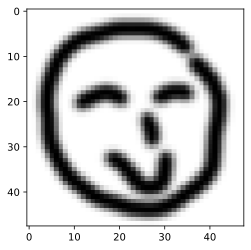

In [7]:
try:
    f_smiley = plt.imread('smiley.png')[:,:,1]
except FileNotFoundError:
    wget.download("https://rvdboomgaard.github.io/ComputerVision_LectureNotes/_static/smiley.png")
    f_smiley = plt.imread('smiley.png')[:,:,1]
plt.imshow(f_smiley, cmap='gray');
print(f_smiley.shape)

We start with a $5\times5$ average filter
\begin{equation}\label{eq:five}
f \ast \frac{1}{25} \begin{bmatrix}
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & \underline1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1
    \end{bmatrix}
\end{equation}

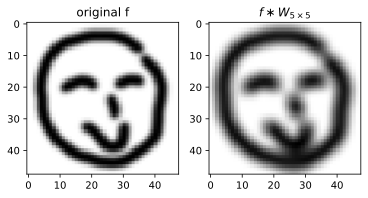

In [8]:
W5x5 = np.ones((5,5))/25
g_smiley_5x5 = convolve(f_smiley, W5x5)
imshow_row([(f_smiley,"original f"), (g_smiley_5x5, r"$f\ast W_{5\times5}$")], axs=True)

You should be aware that something 'strange' is happening here. It indeeds is true that the ``convolve`` function implements the convolution that was given in the equation just above. That is indeed strange as the origin of the array (image is in the top left pixel, with x running from left to right and y running from top to bottom). So the convolve function somehow set the origin to be in the center of the array. And indeed it does. Read the documentation.

In the ``convolve`` function we can override the position of the origin. Let's do the convolution
\begin{equation}\label{eq:fivetopleft}
f \ast \frac{1}{25} \begin{Bmatrix}
    \underline1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1
    \end{Bmatrix}
\end{equation}
Before you run the next cell, what do you think will be the difference with the kernel with origin in the center?

Note that the ``origin`` named argument of the convolution function is relative to the assumed origin in the center of the array passed to the function as argument ``weights``. So ``origin=(-2,-2)`` sets the origin to the top left element in the (5,5) shaped array ``W5x5``.

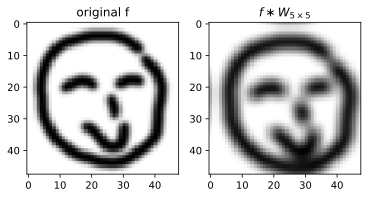

In [9]:
g_smiley_tl = convolve(f_smiley, W5x5, origin=(-2,-2))
imshow_row([(f_smiley,"original f"), (g_smiley_tl, r"$f\ast W_{5\times5}$")], axs=True)

The two convolutions are the same.


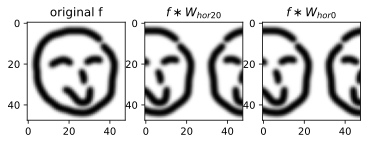

In [10]:
W_hor_0 = np.zeros((1,41))
W_hor_20 = np.zeros((1,41))
W_hor_20[0,20] = 1
W_hor_0[0,0] = 1
g_smiley_hor_20 = convolve(f_smiley, W_hor_0, mode='mirror')
g_smiley_hor_0 = convolve(f_smiley, W_hor_20, origin=(0,20), mode='mirror')
imshow_row([(f_smiley,"original f"), 
            (g_smiley_hor_20, r"$f\ast W_{hor20}$"),
            (g_smiley_hor_0, r"$f\ast W_{hor0}$")], axs=True)
if (g_smiley_hor_20 == g_smiley_hor_0).all():
    print("The two convolutions are the same.")
else:
    print("Something went wrong.")

### Exercise 1a: The pulse function

Answer the theory question about the pulse function in ANS. You can check your answers with the following code:

In [11]:
def Delta(k, l):
    m = 2 * np.maximum(np.abs(k), np.abs(l)) + 1
    c = m // 2
    D = np.zeros((m,m))
    D[c+k, c+l] = 1
    return D

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


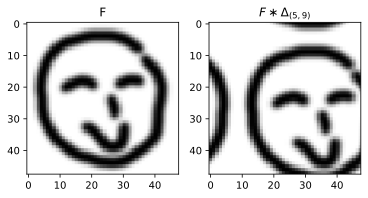

In [12]:
print(Delta(-2,-2))
print(Delta(5,3))

imshow_row([(f_smiley,"F"), (convolve(f_smiley, Delta(5,9)), r"$F\ast\Delta_{(5,9)}$")], axs=True)

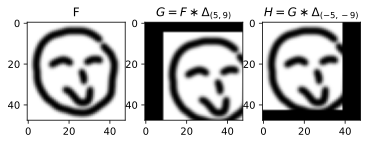

In [13]:
border_mode = "constant"
G = convolve(f_smiley, Delta(5,9), mode=border_mode)
H = convolve(G, Delta(-5,-9), mode=border_mode)
imshow_row([(f_smiley,"F"), 
            (G, r"$G = F\ast\Delta_{(5,9)}$"),
            (H, r"$H = G\ast\Delta_{(-5,-9)}$")], axs=True)

### Exercise 1b: Border modes

Try the different border modes in de code above and answer the questions in ANS.

The problem we saw above can be generalised. The fact that for most border modes $(F\ast\Delta_{(k,l)})\ast\Delta_{(-k,-l)} \not= F \ast (\Delta_{(k,l)} \ast \Delta_{(-k,-l)}) = F\ast\Delta_{(0,0)}$ implies that associativity of the convolution operator, as it is true for an unbounded image domain, is not true for images defined on a bounded domain.

Associativity is not the only property of convolutions that is not strictly valid in a discrete and bounded domain setting. In theory (in an infinite domain) we have $F\ast W = W\ast F$ showing that $F$ and $W$ are to be treated equally. That is not the case in practice as the code snippet below illustrates.

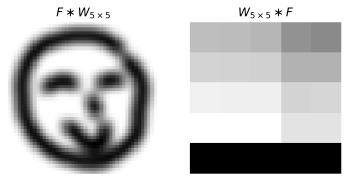

In [14]:
imshow_row( [(convolve(f_smiley, W5x5), r"$F\ast W_{5\times5}$"),
             (convolve(W5x5, f_smiley), r"$W_{5\times5}\ast F$")] )

We see that commutativity is not strictly true in the bounded discrete domain. And again by chosing the appropriate border mode *and* embedding the small 5x5 kernel into a larger kernel (the size of the image we want) we can obtain something that looks like commutativity.

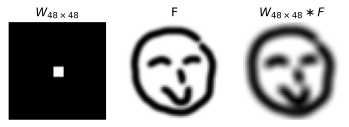

In [15]:
W48x48 = np.zeros((48,48))
W48x48[22:27,22:27] = W5x5
imshow_row( [(W48x48, r"$W_{48\times48}$"),
             (f_smiley, "F"),
             (convolve(W48x48, f_smiley, mode="wrap"), r"$W_{48\times48} \ast F$")])

### Exercise 1c: Convolution operators

Answer the theory question about Convolution operators in ANS.

## 2. Derivative convolutions

The weights in the kernel function do not need to be positive. With negative weights in the kernel we can measure differences and therefore derivatives. In the lecture notes (Part 1 Image Processing, section 6.1.2) three different finite difference schemes (convolution kernels) are given to calculate the partial derivative in x direction.
\begin{align}
F_x &\approx F \ast \begin{Bmatrix}1 & \underline {-1} & 0\end{Bmatrix}\\
F_x &\approx F \ast \begin{Bmatrix}0 & \underline {1} & -1\end{Bmatrix}\\
F_x &\approx F \ast \frac{1}{2}\begin{Bmatrix}1 & \underline {0} & -1\end{Bmatrix}\\
\end{align}

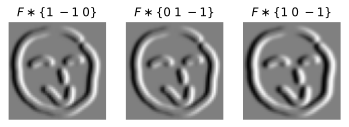

In [16]:
Dright = np.array([[1,-1,0]])
Dleft = np.array([[0,1,-1]])
Dcentral = np.array([[1,0,-1]])/2

Fxright = convolve(f_smiley, Dright)
Fxleft = convolve(f_smiley, Dleft)
Fxcentral = convolve(f_smiley, Dcentral)
imshow_row([(Fxright, r"$F \ast \{1 \; -1 \; 0\}$"),
            (Fxleft, r"$F \ast \{0 \; 1 \; -1\}$"),
            (Fxcentral, r"$F \ast \{1 \; 0 \; -1\}$")])

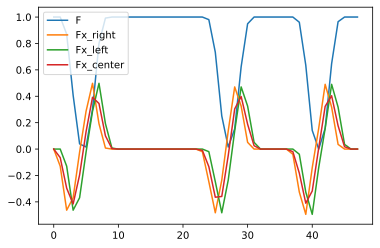

In [17]:
plt.plot(f_smiley[28], label='F')
plt.plot(Fxright[28], label='Fx_right')
plt.plot(Fxleft[28], label='Fx_left')
plt.plot(Fxcentral[28], label='Fx_center')
plt.legend();

### Exercise 1d: Differences

Answer the theory question about differences in ANS.

## 3. Separable Convolutions

An important consequence of the associative property is that some convolution kernels are **dimensionally separable**. Consider the $t\times7$ kernel, this one can be decomposed as the convolution of a horizontal line of 7 ones and a vertical kernel of 7 ones:
\begin{align}
\begin{Bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & \underline 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1
\end{Bmatrix} &=
\begin{Bmatrix}
1\\ 1\\ 1\\ \underline 1\\ 1\\ 1\\ 1
\end{Bmatrix}
\ast
\begin{Bmatrix}
1 & 1 & 1 & \underline 1 & 1 & 1 & 1
\end{Bmatrix} \\
W_{7\times7} &= W_{7\times1} \ast W_{1\times7}
\end{align}

Be sure to understand that the above equality is indeed true, i.e. you should be able to do the convolution in the right hand side and find the kernel in the left hand side. For implementing the convolution
\begin{align}
F \ast W_{7\times7}
\end{align}
we need 49 additions (and multiplications in case the kernel was not a uniform kernel) per pixel. However we can also implement it as
\begin{align}
(F\ast W_{7\times1})\ast W_{1\times7}
\end{align}
and then we need only $2\times 7$ addition/multiplications per pixel.

In the next code block you have to time several implementations of a uniform filter of varying sizes. The first convolution to test is
\begin{align}
F \ast W_{N\times N}
\end{align}
with a function call ``convolve(F, np.ones((N, N)))``
The second one
\begin{align}
(F\ast W_{N\times1})\ast W_{1\times N}
\end{align}
in Python: ``convolve(convolve(F, np.ones((N, 1))), np.ones((1, N)))``
and also the ``uniform_filter`` from ``scipy.ndimage``: ``uniform_filter(F, N)``.
To help you we give you the basic code to run the three versions of a uniform filter:

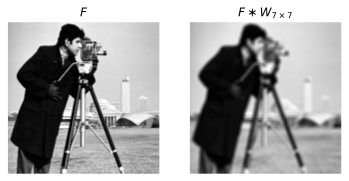

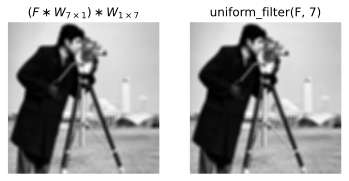

In [18]:
try:
    Fcam = plt.imread('cameraman.png')
except FileNotFoundError:
    wget.download("https://staff.fnwi.uva.nl/r.vandenboomgaard/ComputerVision/_images/cameraman.png")
    Fcam = plt.imread('cameraman.png')

Fcam_2d_7 = convolve(Fcam, np.ones((7,7)))
Fcam_sep_7 = convolve(convolve(Fcam, np.ones((7, 1))), np.ones((1, 7)))
from scipy.ndimage import uniform_filter
Fcam_scipy = uniform_filter(Fcam, 7)

imshow_row([(Fcam, r"$F$"),
            (Fcam_2d_7, r"$F\ast W_{7\times7}$")])
plt.figure()
imshow_row([(Fcam_sep_7, r"$(F\ast W_{7\times1})\ast W_{1\times7}$"),
            (Fcam_scipy, "uniform_filter(F, 7)")])

### Programming exercise 1

Time the three versions of the uniform convolution for different values of N in the first exercise of the hand-in notebook for assignment 3. Then answer the questions about your timing diagrams.

### Exercise 1e: Sobel filter

Answer the theory question about the Sobel filter in ANS.

## 4. Impulse Responses

In the lecture notes in the section on [linear local operators](https://rvdboomgaard.github.io/ComputerVision_LectureNotes/LectureNotes/IP/LocalOperators/linearoperators.html#) it was shown that a linear, translation invariant operator is a convolution using the impulse response as the kernel. So given an image filter claimed to be linear and translation invariant we may find the impulse response by running the filter on an image showing a single point with value 1, all other values are zero.

In [19]:
I = np.zeros((11,11))
I[5,5] = 1
print(I)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
uniformI = uniform_filter(I, 7)
print(uniformI)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


Note: we have set the pulse in the middle of the 11x11 image. This means that the origin of the impulse response function is also at that point in the middle.

### Programming exercise 2 + 3

Now make the programming exercises 2 and 3 in the hand-in notebook for assignment 3.

### Exercise 1f. Sobel and Prewitt

Answer the theory question about Sobel and Prewitt filters in ANS.

## 5. Analytical Derivatives

Consider the function $f$ in two variables:
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}

### Exercise 2a. Partial derivatives

Answer the theory question about partial derivatives in ANS.

Next we are going to sample the functions $f$, $f_x$ and $f_y$ on a regular grid of 128x128 sample points with $x$ and $y$ values ranging from $-1$ to $1$. We will use a ``meshgrid`` to make two arrays ``X`` and ``Y`` where ``X`` gives the $x$ coordinate for each of the points on the regular grid and ``Y`` gives the $y$ coordinates.

In [21]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)

### Programming exercise 4

Now make the programming exercise 4 and write the code to generate the discrete images (sampled functions) ``F``, ``Fx`` and ``Fy``. 

## 6. Finite Difference Derivatives

We are more or less going to repeat the exercise from the previous section. This time for the function:

\begin{align}
f(x,y) = 3(1-x)^2 \exp\left(-x^2 - (y-1)^2\right)
 - 10\left(\frac{x}{5} - x^3 - y^5\right) \exp\left(-x^2 - y^2\right) 
 - \frac{1}{3} \exp\left(-(x+1)^2 - y^2\right)
 \end{align}
 
This is the image that in 3D rendering make up the Matlab logo (consider this a tribute to the legacy of a great program after which many array processing languages are modelled).

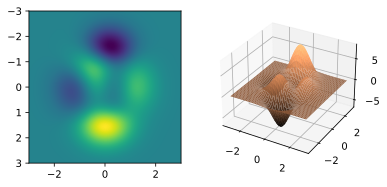

In [22]:
# %matplotlib qt  # use this in case you want an interactive 3D plot
from mpl_toolkits.mplot3d import Axes3D

xml = np.linspace(-3, 3, 150)
yml = np.linspace(-3, 3, 150)
Xml, Yml = np.meshgrid(xml, yml)
Fml = 3 * (1-Xml)**2 * np.exp(-(Xml**2) - (Yml+1)**2) \
    - 10 * (Xml/5 - Xml**3 - Yml**5) * np.exp(-Xml**2 - Yml**2) \
    - 1/3 * np.exp(-(Xml+1)**2 - Yml**2) 

fig = plt.figure(99)
ax1 = fig.add_subplot(121)
ax1.imshow(Fml, extent=(-3,3,3,-3), origin='upper');
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Xml, Yml, Fml, cmap='copper');

Like in the previous section we could calculate the partial derivative with respect to $x$ and $y$ analytically (be my guest to do it!). In this section however you have to use the left finite difference convolution from programming exercise 3 to estimate the derivates.

### Programming exercise 5

Now make the programming exercise 5.

## 7. Gaussian Derivatives

### Sampling of and Convolution with the Gaussian 2D Function

The 2D Gaussian function $G^s(x,y)$ is defined as:
\begin{align}
G^s(x,y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2+y^2}{2 s^2}}
\end{align}
To do a convolution with a Gaussian kernel we have to sample this function on a discrete grid.
Note that the function never is zero! For large values of $|x|$ and $|y|$ the function quickly approaches zero fortunately so we may truncate the grid to values $-N, -N+1, \cdots, -2, -1, 0, 1, 2, \cdots, N$ for both $x$ and $y$.

To generate the grid the ``np.meshgrid`` function can be used again. The selected value for $N$ should of course depend on the scale $s$. In your code you have to set $N$ equal to $\lceil\mathtt{factor} \times \mathtt{scale}\rceil$ where ``factor`` is a multiplication factor that influences the approximation error caused by truncating the function.

### Programming exercise 6

Now make programming exercise 6 and write the code for the 2D Gaussian function. Then answer the questions about the exercise.

### Sampling the (Derivative of) the 1D Gauss Function

In the lecture notes you can learn that the Gaussian function is the only rotationally symmetric function that can is separable by dimension, i.e.
\begin{align}
G^s(x, y) = G^s(x)\,G^s(y)
\end{align}
where we have used $G^s$ to denote both the 2D function as well as the 1D Gaussian function. The context will make this clear. In this subsection only the 1D version of $G^s$ (and its derivatives) are discussed and to be implemented.

### Exercise 2b: Gaussian Derivatives

Answer the theory question about Gaussian Derivatives in ANS.

Evidently $P_1(x)=1$ and it is your task to calculate $P_1(x)$ and $P_2(x)$. Hint: both $P_1$ and $P_2$ are polynomials in $x$. In your code you have to sample (and normalize) $G^s(x)$ and multiply that discrete version with the appropriate sampled version of $P_n(x)$.

### Programming exercise 7

Now make programming exercise 7 and write the code for the 1D Gaussian function. Test the correctness of your results.

### Separable Gaussian (Derivative) Convolution

A convolution kernel $w(x,y)$ is called separable in case
$$w(x,y) = h(x)\,v(y)$$
where $h$ and $v$ are two 1D functions (where $h$ stands for the horizontal function and $v$ for the vertical function). It is simple to prove that for a separable kernel:
\begin{align}
f\ast w = (f\ast_h h) \ast_v v
\end{align}
where $f \ast_h h$ is the 1D convolution of a 2D image $f$ along all its rows with kernel $h$ and $\ast_v$ is the convolution of an image along all its columns. We have seen this property before for the uniform kernel. There are many separable kernels of course but the Gaussian kernel is the unique kernel that is rotationally symmetric.

### Exercise 2c and 2d: Gaussian Derivatives and Seperability

Finish the theory question on the Gaussian Derivatives and seperability in ANS.

In ``scipy.ndimage`` a special function is available to do one dimensional convolutions along one of the axes of the image array: ``convolve1d``. The ``axis`` named parameter indicates along wich axis the convolution has to be done.

### Programming exercise 8

Now make programming exercise 8 and write the code for the gD function.

## 8. Comparing Derivatives

Remember the function
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}
and its derivatives $f_x$ and $f_y$ that you have calculated before in this lab exercise. Now we are going to compare the analytical results with the results calculated with Gaussian derivative convolutions.

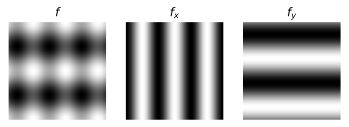

In [23]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)
A = 1
B = 2
V = 6 * np.pi / 100
W = 4 * np.pi / 100

# Repeat your code for F, Fx and Fx here (see programming exercise 4):

def F_partial_derivatives(X, Y):
    A = 1
    B = 2
    V = 6 * np.pi / 100
    W = 4 * np.pi / 100

    F = A * np.sin(V * X) + B * np.cos(W * Y)
    Fx = A * V * np.cos(V * X)
    Fy = -B * W * np.sin(W * Y)

    return F, Fx, Fy

F, Fx, Fy = F_partial_derivatives(X, Y)

imshow_row([(F, r"$f$"),
            (Fx, r"$f_x$"),
            (Fy, r"$f_y$")])
plt.gray()

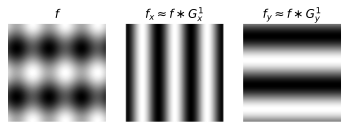

In [32]:
# Repeat your code for Gauss1d and gd here (see programming exercise 7 and 8):

def Gauss1d(scale, order=0, factor=3):
    """If order=0, this function should give a normalized sample of the 1d Gaussian function,
    similar to the Gauss2d function above. If order=1 or order=2, this function should give an
    approximation for the first respectively second derivative by multiplying this sample by the
    appropriate analytically determined polynomial (see guide notebook)."""
    N = np.ceil(scale * factor).astype(int)

    X = np.arange(- N, N + 1)
    G = (1 / (scale * np.sqrt(2 * np.pi))) * np.exp(-(X**2) / (2 * scale**2))
    G = G / np.sum(G)
    if order == 0:
        G = G /  np.sum(G)
        return X, G
    if order == 1:
        G = -X * G / scale ** 2
        return X, G
    if order == 2:
        G = (X**2 - scale**2) / scale**4 * G
        return X, G

from scipy.ndimage import convolve1d

def gD(f, scales, orders, factor=3, mode="nearest", cval=0):
    """
    f: the function to convolve
    scales: the scales in the x and y direction, respectively
    orders: the orders of the derivatives (0 <= order <= 2)
    factor: the factor with which you compute the scale to get the size of the domain.
    mode, cval: the border mode to use in the convolution, and the constant value in case the mode is `constant`.

    returns: the convolution of f with the appropriate Gaussian derivative.
    """

    _, gauss_kernel_horizontal = Gauss1d(scales[0], orders[0], factor)
    _, gauss_kernel_vertical = Gauss1d(scales[1], orders[1], factor)

    return convolve1d(
        convolve1d(f, gauss_kernel_horizontal, axis=0, mode=mode, cval=cval),
        gauss_kernel_vertical,
        axis=1,
        mode=mode,
        cval=cval,
    )

s = 1

# Use the function gD to calculate cFx, cFy by Gaussian derivative convolutions.

cFx = gD(F, (1, s), (0, 1))
cFy = gD(F, (s, 1), (1, 0))

imshow_row([(F, r"$f$"),
            (cFx, r"$f_x\approx f \ast G^1_x$"),
            (cFy, r"$f_y\approx f \ast G^1_y$")])

Let's compare Fx with cFx by plotting the values along a horizontal line through the center of the image.

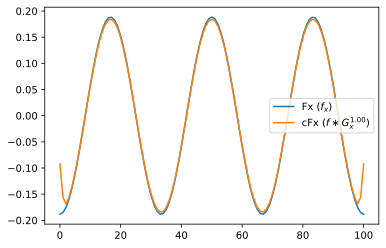

In [33]:
plt.figure()
plt.plot(Fx[Fx.shape[0]//2], label=r"Fx $(f_x)$")
plt.plot(cFx[cFx.shape[0]//2], label=r"cFx $(f \ast G^{%5.2f}_x)$" % s)
plt.legend();

### Exercise 2e: Comparing Derivatives

Finish the theory question about Comparing Derivatives in ANS.

## 5. Canny Edge Detector

Finding edges in images is often an important first step in image processing applications. Whereas in the past a lot of edge detectors have been suggested, nowadays most often the Canny edge detector is used.

An explanation of the Canny edge detector in terms of local structure as calculated with Gaussian derivatives can be found [here](https://rvdboomgaard.github.io/ComputerVision_LectureNotes/LectureNotes/IP/LocalStructure/CannyEdgeDetector.html#canny-edge-detector)

### Programming exercise 9

Now make programming exercise 9 and implement the Canny edge detector.